# **Dependencies**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# **Settings**
Some general settings used on the notebook

In [ ]:
# Set aspects of the visual theme for all matplotlib and seaborn plots.
sns.set()

# Seed constant used in project
MYSEED = 42

# **K-means**

## **Goalscorers**

In [ ]:
goalscorers = pd.read_csv('goalscorers.csv')
goalscorers

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
41003,2022-12-18,Argentina,France,Argentina,Ángel Di María,36.0,False,False
41004,2022-12-18,Argentina,France,France,Kylian Mbappé,80.0,False,True
41005,2022-12-18,Argentina,France,France,Kylian Mbappé,81.0,False,False
41006,2022-12-18,Argentina,France,Argentina,Lionel Messi,109.0,False,False


## **Results**

In [ ]:
results = pd.read_csv('results.csv')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False


In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
for colums in results.columns:
  if results[colums].dtypes == 'object':
    results[colums] = le.fit_transform(results[colums])

results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,238,83,0,0,71,645,205,False
1,1,83,233,4,2,71,1010,69,False
2,2,238,83,2,1,71,645,205,False
3,3,83,233,2,2,71,1010,69,False
4,4,238,83,3,0,71,645,205,False
...,...,...,...,...,...,...,...,...,...
44552,15570,118,31,3,1,29,1557,64,True
44553,15570,116,176,0,0,29,282,16,True
44554,15570,34,275,1,2,29,1484,27,False
44555,15570,287,240,1,2,29,1513,248,False


In [ ]:
results = results.drop(columns='country')
results = results.drop(columns='date')
corr= results.corr()
corr.style.background_gradient(cmap='coolwarm')

,home_team,away_team,home_score,away_score,tournament,city,neutral
home_team,1.000000,-0.002547,0.005678,-0.019145,-0.015363,-0.036268,-0.064830
away_team,-0.002547,1.000000,-0.006455,0.022336,-0.016234,-0.023432,0.099985
home_score,0.005678,-0.006455,1.000000,-0.138503,-0.001024,0.002469,-0.035693
away_score,-0.019145,0.022336,-0.138503,1.000000,0.029248,0.007150,0.083190
tournament,-0.015363,-0.016234,-0.001024,0.029248,1.000000,0.069690,-0.109471
city,-0.036268,-0.023432,0.002469,0.007150,0.069690,1.000000,-0.024859
neutral,-0.064830,0.099985,-0.035693,0.083190,-0.109471,-0.024859,1.000000


<Axes: xlabel='home_score', ylabel='away_score'>

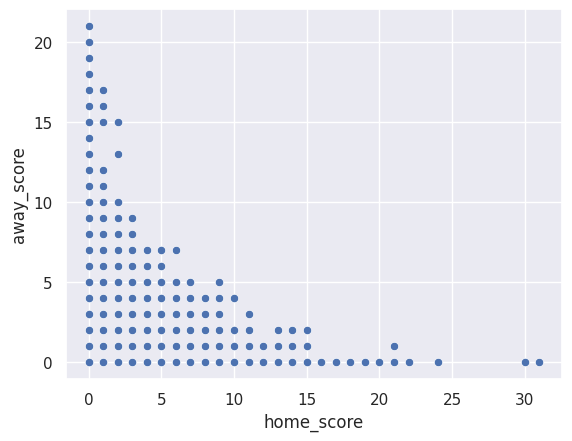

In [ ]:
sns.scatterplot(data=results, x='home_score', y='away_score')

In [ ]:
results_group = results[['home_score','away_score']]

#Para k = 2

In [ ]:
kmeans  = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(results_group)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

<Axes: xlabel='home_score', ylabel='away_score'>

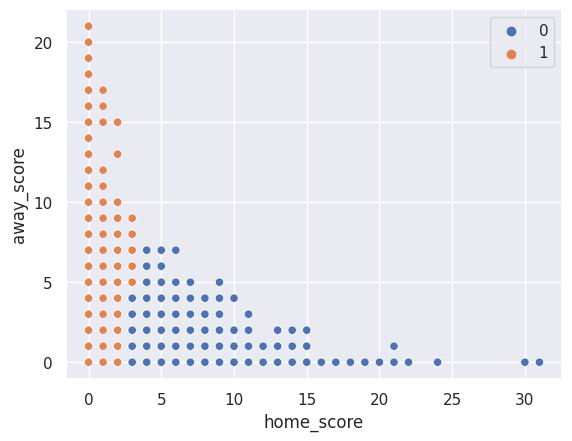

In [ ]:
sns.scatterplot(data=results, x='home_score', y='away_score', hue=kmeans.labels_)

#Para k = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='home_score', ylabel='away_score'>

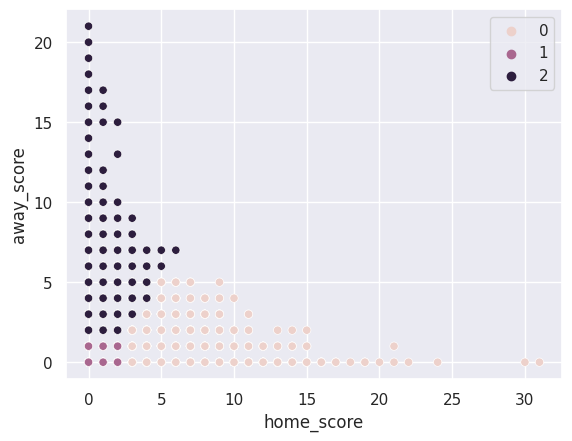

In [ ]:
kmeans  = KMeans(n_clusters=3)
kmeans.fit(results_group)
kmeans.labels_
sns.scatterplot(data=results, x='home_score', y='away_score', hue=kmeans.labels_)

<Axes: xlabel='tournament', ylabel='neutral'>

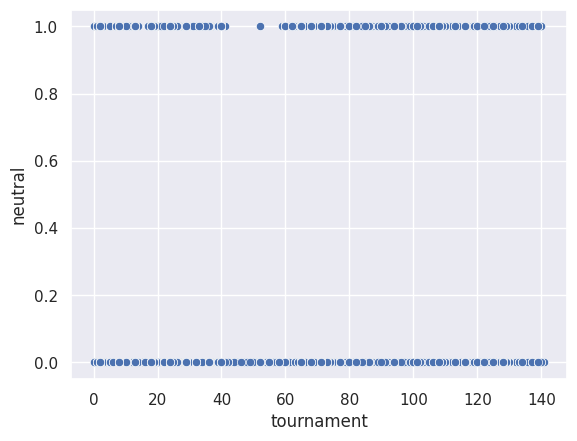

In [ ]:
sns.scatterplot(data=results, x='tournament', y='neutral')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='tournament', ylabel='neutral'>

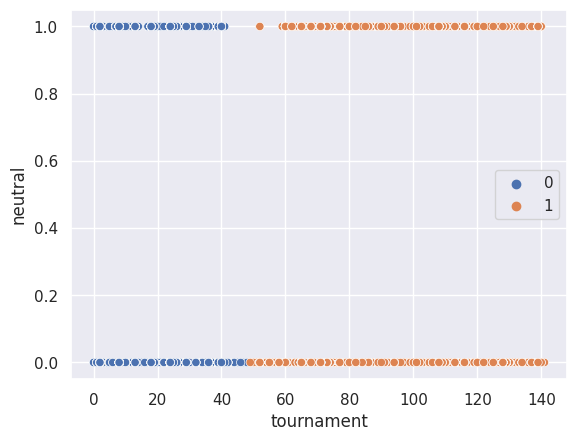

In [ ]:
results_group2 = results[['tournament','neutral']]
kmeans  = KMeans(n_clusters=2)
kmeans.fit(results_group2)
kmeans.labels_
sns.scatterplot(data=results, x='tournament', y='neutral', hue=kmeans.labels_)

#Answers:
    No pattern was detected and no new question was discovered.

## **Shootouts**

In [ ]:
shootouts = pd.read_csv('shootouts.csv')
shootouts['date'] = pd.to_datetime(shootouts.date)
shootouts['year'] = shootouts.date.map(lambda x: x.year)
shootouts

,date,home_team,away_team,winner,year
0,1967-08-22,India,Taiwan,Taiwan,1967
1,1971-11-14,South Korea,Vietnam Republic,South Korea,1971
2,1972-05-07,South Korea,Iraq,Iraq,1972
3,1972-05-17,Thailand,South Korea,South Korea,1972
4,1972-05-19,Thailand,Cambodia,Thailand,1972
...,...,...,...,...,...
542,2022-12-05,Japan,Croatia,Croatia,2022
543,2022-12-06,Morocco,Spain,Morocco,2022
544,2022-12-09,Croatia,Brazil,Croatia,2022
545,2022-12-09,Netherlands,Argentina,Argentina,2022


### 1. **Total penalty shootouts absolute frequency**

In [ ]:
# Calculate the absolute frequency
shootouts_rate_domain = shootouts.home_team.value_counts().add(shootouts.away_team.value_counts(), fill_value=0)
# Filter low result
shootouts_rate_domain = shootouts_rate_domain.to_frame().reset_index()
shootouts_rate_domain.rename(columns={'index': 'country', 0:'total_penalties'}, inplace=True)
shootouts_rate_domain.sort_values(by='total_penalties', ascending=False, inplace=True)
shootouts_rate_domain.head()

,country,total_penalties
200,Zambia,24.0
165,South Korea,23.0
164,South Africa,23.0
5,Argentina,22.0
51,Egypt,22.0


### 2. **Penalty shootouts wins absolute frequency**

In [ ]:
# Calculate absolute frequency of wins
shootouts_count = shootouts.winner.value_counts().to_frame().reset_index()
shootouts_count.rename(columns={'index': 'country'}, inplace=True)
shootouts_count.head()

,country,winner
0,Argentina,14
1,South Korea,13
2,Egypt,13
3,Zambia,13
4,South Africa,11


### 3. **Penalty shootouts peformance**

In [ ]:
shootouts_frequency = shootouts_rate_domain.merge(shootouts_count, left_on='country', right_on='country')
shootouts_frequency['ratio'] = shootouts_frequency.winner / shootouts_frequency.total_penalties
shootouts_frequency

,country,total_penalties,winner,ratio
0,Zambia,24.0,13,0.541667
1,South Korea,23.0,13,0.565217
2,South Africa,23.0,11,0.478261
3,Argentina,22.0,14,0.636364
4,Egypt,22.0,13,0.590909
...,...,...,...,...
154,Myanmar,1.0,1,1.000000
155,Bulgaria,1.0,1,1.000000
156,Slovenia,1.0,1,1.000000
157,County of Nice,1.0,1,1.000000


### **4. Applying k-means to numeric columns**

In [ ]:
kmeans_shootouts = KMeans(n_clusters=3, n_init=10, random_state=MYSEED)
kmeans_shootouts.fit(shootouts_frequency[['total_penalties', 'winner', 'ratio']])
kmeans_shootouts.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

### **5. Groups Visualization**

Text(0, 0.5, 'winner_penalties')

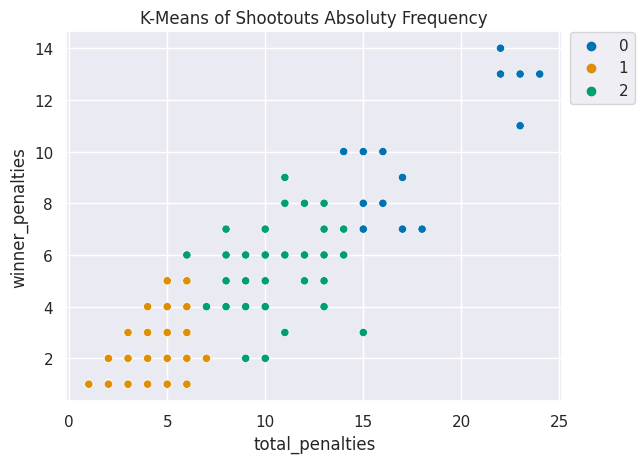

In [ ]:
ax = sns.scatterplot(data=shootouts_frequency, y="winner", x="total_penalties", hue=kmeans_shootouts.labels_, palette="colorblind")
ax.set_title("K-Means of Shootouts Absoluty Frequency")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1.02))
ax.set_ylabel("winner_penalties")

### **6. Conclusion**

**Answer:** It can be seen that the grouping was based on the total number of disputed penalty shootouts.
- Group 0: High number of penalty shootouts.
- Group 1: Low number of penalty shootouts.
- Group 2: Medium number of penalty shootouts.

## **Elo Ranking**

### **1. Elaboration**

#### **1.1. Functions**

In [ ]:
# Return expected result probabilty
def expected_result(ranking_a, ranking_b, home_advantage):
    return 1 / (10**(-((ranking_a+home_advantage)-ranking_b)/400) + 1)

# Return result by goal diference
def result(goal_dif):
    # return 0 to lost
    if goal_dif < 0:
        return 0
    # return 0.5 to draw
    elif goal_dif == 0:
        return 0.5
    # return 1 to win
    return 1


# The number of goals is taken into account by use of a goal difference index
def goal_index(goal_dif):
    goal_dif = abs(goal_dif)
    if goal_dif <= 1:
        return 1
    elif goal_dif == 2:
        return 3/2
    else:
        return (11 + goal_dif) / 8


# Return tournament weight constant
def tournament_weight(tournament):
    # 60 points
    world_cup = 'FIFA World Cup'
    # 50 points
    continental = ['AFC Asian Cup', 'Africa Cup of Nations',
                  'CONCACAF Gold Cup', 'Copa América', 'OFC Nations Cup',
                  'UEFA European Championship', 'CONCACAF Cup', 'AFC Solidarity Cup',
                  'AFC Challenge Cup', 'Confederations Cup', 'CONMEBOL–UEFA Cup of Champions']
    # 40 points
    international_qualifiers_and_majors = ['UEFA Nations League', 'FIFA World Cup qualification',  
                                           'CONCACAF Nations League', 'African Nations Championship']
    # 30 points
    continental_qualifiers = ['UEFA Euro qualification', 'African Cup of Nations qualification', 'AFC Asian Cup qualification',
                              'Copa América qualification']
    # 20 points + others
    friendly = 'Friendly'
    
    if tournament == world_cup:
        return 60
    elif tournament in continental:
        return 50
    elif tournament in international_qualifiers_and_majors:
        return 40
    elif tournament in continental_qualifiers:
        return 30
    elif tournament == friendly:
        return 20
    else:
        return 20


# Calculate change of points
def points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=100):
    g = goal_index(goal_dif)
    k = tournament_weight(tournament)
    w = result(goal_dif)
    we = expected_result(ranking_a, ranking_b, home_advantage)
    return g * k * (w - we)


# Return a tuple with the ranking of A and the ranking of B
def elo(ranking_a, ranking_b, goal_dif, tournament, neutral):
    
    if neutral:
        points = points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=0)
    else:
        points = points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=100)
    
    return ranking_a + points, ranking_b - points

#### **1.2. Data Processing**

In [ ]:
# Create a goal_dif column
results['goal_dif'] = results['home_score'] - results['away_score']
# Create a total_goals column
results['total_goals'] = results['home_score'] + results['away_score']
# Change type of date column to datetime
results['date'] = pd.to_datetime(results.date)
# Add column year
results['year'] = results.date.map(lambda x: x.year)


# Assigning default rating of 1500 to each team
unique_team_list = np.unique(pd.concat([results.home_team, results.away_team], ignore_index=True))
rating_dict = {team:1500 for team in unique_team_list}
# Assign each year of dataset
year_list = results.year.unique()
year_dict = dict()

# Itarate years to calculate elo ranking
for year in year_list:
    # Select mask with year of the iteration
    mask = results['year'] == year
    results_temp = results[mask][['home_team', 'away_team', 'goal_dif', 'tournament', 'neutral']]
    
    # Iterate dataframe to calculate elo ranking changes
    for index, row in results_temp.iterrows():
        
        # Get home and away teams names
        home_team = row.home_team
        away_team = row.away_team
        
        # Get other informations
        goal_dif = row.goal_dif
        tournament = row.tournament
        neutral = row.neutral
        
        # Get home and away teams scores
        home_team_score = rating_dict[home_team]
        away_team_score = rating_dict[away_team]
        
        # Calculate new scores according to result of the match
        home_team_score, away_team_score = elo(home_team_score, away_team_score, goal_dif, tournament, neutral)
        
        # Assign new scores
        rating_dict[home_team] = home_team_score
        rating_dict[away_team] = away_team_score

    # Transform rating_dict into DataFrame
    year_dict[year] = rating_dict.copy()

country_ranking = pd.DataFrame.from_dict(year_dict)
country_ranking = country_ranking.reset_index().rename(columns={'index': 'country'})
country_ranking.head()

,country,1872,1873,1874,1875,1876,1877,1878,1879,1880,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Abkhazia,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1495.933727,1495.933727,1541.988144,1536.597870,1573.682634,1590.633376,1590.633376,1590.633376,1590.633376,1590.633376
1,Afghanistan,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1285.742074,1309.722983,1313.441091,1321.562707,1314.735193,1310.864965,1310.864965,1315.257412,1279.155143,1279.155143
2,Albania,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1607.064865,1630.177782,1596.914714,1624.582143,1536.531153,1551.969675,1576.881358,1607.633618,1569.770664,1566.368467
3,Alderney,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1399.481222,1355.675185,1355.675185,1343.731168,1343.731168,1336.859702,1336.859702,1336.859702,1336.859702,1336.859702
4,Algeria,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,1500.0,...,1740.572990,1738.971650,1710.647093,1652.414608,1614.162237,1741.221947,1756.721522,1818.896327,1796.483943,1800.388304


### **2. Applying k-means to numeric columns**

In [ ]:
# Select numeric columns and change type of column name
teste = country_ranking.iloc[:, 1:].copy()
teste.columns = teste.columns.astype(str)

In [ ]:
kmeans_elo = KMeans(n_clusters=4, n_init=20, random_state=MYSEED)
kmeans_elo.fit(teste)
kmeans_elo.labels_

array([2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 3, 2, 2, 1, 2, 0, 0, 2, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 3, 1, 2, 1, 2, 0,
       2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 2, 1, 0, 3, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 3, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 3, 2, 1, 1, 0, 0, 2, 2,
       2, 0, 3, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3,
       2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2,
       2, 0, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 3,
       0, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 3, 1, 2, 2, 2,
       3, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2,
       2, 2, 0, 2, 2, 0, 1, 3, 0, 2, 2, 2, 2, 1, 0,

### **3. Groups Visualization**

**Observation:** 2002 was chosen as the x-axis, but it could have been any year.

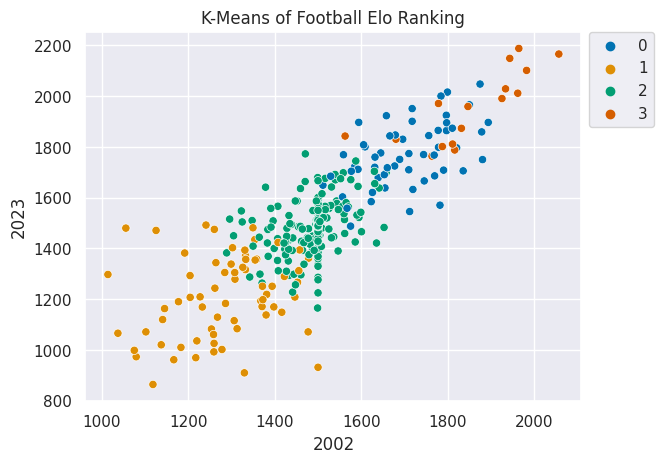

In [ ]:
ax = sns.scatterplot(data=teste, y='2023', x='2002', hue=kmeans_elo.labels_, palette="colorblind")
ax.set_title("K-Means of Football Elo Ranking")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1.02))

### **4. Conclusion**

**Answer:** It is noticed the existence of 3 groups, that historically determine the quality of the teams that compose it.
- Group 0: Good teams.
- Group 1: Bad teams.
- Group 2: Average teams.
- Group 3: Greatest teams.